Your 3 year-old son is an evil genius. While Mom is busy washing dishes, your son came up with a very silly game of mixing his chocolate milk and orange juice. He first pours 30% of chocolate milk to the cup that has orange juice originally, then pours 20% of whatever-it-is-now in the orange juice cup to the chocolate milk cup. He started with exactly 1 cup of chocolate milk and 1 cup of orange juice.

1. He just went through the first cycle of mixing each other cup. How much liquid is in each cup now?

In [1]:
import numpy as np
import pandas as pd

In [2]:
choco_to_orange = np.array([[0.7, 0.0], [0.3, 1.0]])
orange_to_choco = np.array([[1.0, 0.2], [0.0, 0.8]])
one_cycle = np.dot(orange_to_choco, choco_to_orange)

state_0 = np.array([1, 1])
state_1 = np.dot(one_cycle, state_0)

print(f'Amount of liquid in choco milk cup after one cycle: {state_1[0]}')
print(f'Amount of liquid in orange juice cup after one cycle: {state_1[1]}')

Amount of liquid in choco milk cup after one cycle: 0.96
Amount of liquid in orange juice cup after one cycle: 1.04


2. He went through 10 cycles of mixing things. How much liquid is in each cup now?

In [3]:
curr_state = np.array([1, 1])
for i in range(10):
    curr_state = np.dot(one_cycle, curr_state)

print(f'Amount of liquid in choco milk cup after 10 cycles: {curr_state[0]}')
print(f'Amount of liquid in orange juice cup after 10 cycles: {curr_state[1]}')

Amount of liquid in choco milk cup after 10 cycles: 0.9093666413537239
Amount of liquid in orange juice cup after 10 cycles: 1.0906333586462766


3. Create a Pandas data frame with the columns of `number_of_cycle`, `volume_of_chocolate_cup`, `volume_of_orange_cup`. The number of cycle variable ranges from 1 to 100.

<AxesSubplot:xlabel='cycle'>

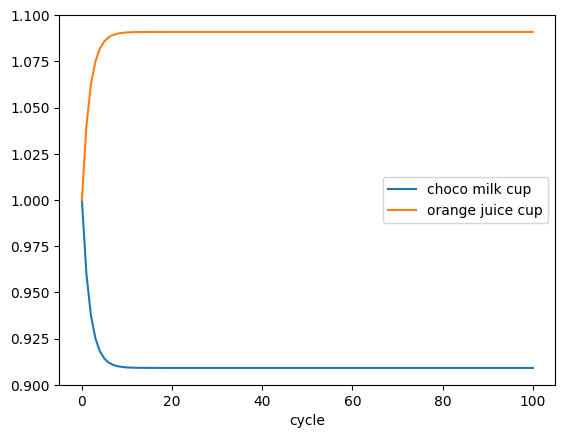

In [4]:
curr_state = np.array([1, 1])
liquid_data = [[0] + curr_state.tolist()]
for i in range(100):
    curr_state = np.dot(one_cycle, curr_state)
    liquid_data.append([i + 1] + curr_state.tolist())

liquid_df = pd.DataFrame(data=liquid_data, columns=['cycle', 'choco milk cup', 'orange juice cup'])
liquid_df.set_index('cycle').plot.line()
